# 0 - PRELIMINARIES

In [42]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

%matplotlib inline

### Acquire

In [39]:
#commenting this out to avoid rerunning when executing whole ntbk.
# !curl -o http://www.hosonline.org/surveys/hos/download/C16B_PUF.zip
# !unzip ../source_data/C16B_PUF.zip -d ../source_data

!head -n 1 ../source_data/C16B_PUF.TXT

Each line is a string of length 105 (spaces represent missing data).  We need to parse each of the 83 fields from this string for each beneficiary record.  Afterwards, we'll save as csv to make i/o to pandas simpler in the future.

In [56]:
#Parsed in accordance with HOS C16 PUF Data User Guide Field Positions available at: http://www.hosonline.org/surveys/hos/download/HOS_DUG_QIO_C16B.pdf
import csv

with open('../source_data/C16B_PUF.TXT') as txt_file:
    records = txt_file.readlines()
    to_comma_delimited = lambda line: [line[0:9]] + list(line[9:38]) + [line[38:40]] + [line[40:42]] + [line[42:44]] + list(line[44:71]) + [line[71:73]]+ list(line[73:89]) + [line[89:92]] + [line[92:94]] + [line[94:99]] + [line[99:102]] + [line[102:104]] + [line[104]]
    transformed_records = [to_comma_delimited(line) for line in records]
    with open('../source_data/C16B_PUF.csv', 'wb') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerows(transformed_records)

Let's verify this worked.

In [61]:
!head -n 1 ../source_data/C16B_PUF.csv

Good.  So let's read it into pandas so we can begin our data inspection.

In [62]:
columns = [u'ID', u'AGEGRP', u'RACE', u'GENDER', u'MRSTAT', u'EDUC', u'BMI', u'GENHTH', u'MODACT', u'CLMBSV', u'PACMPL', u'PLMTKW', u'EACMPL', u'ENTCRF', u'PNINTF', u'PCEFUL', u'ENERGY', u'BLSAD', u'SCLACT', u'ASHLTH', u'ASEHLTH', u'DIFBTH', u'DIFDRS', u'DIFEAT', u'DIFCHR', u'DIFWLK', u'DIFTOL', u'DIFPRM', u'DIFMON', u'DIFMED', u'PHYHTH', u'MENHTH', u'PORHTH', u'BLIND', u'DEAF', u'DIFCON', u'DIFERR', u'MEMINT', u'HIGHBP', u'ANGCAD', u'CHF', u'AMI', u'OTHHRT', u'STROKE', u'COPD_E', u'GI_ETC', u'ATHHIP', u'ATHHAN', u'OSTEOPO', u'SCIATC', u'DIABET', u'DEPRES', u'ANYCAN', u'COLNCA', u'LUNGCA', u'BRSTCA', u'PROSCA', u'OTHCAN', u'PNIACT', u'PNISOC', u'AVGPN', u'FELTNP', u'FELTSD', u'CMPHTH', u'SMKFRQ', u'URNLKG', u'URNMAG', u'URNDOC', u'URNTRT', u'PAOTLK', u'PAOADV', u'BALTLK', u'FELL12MO', u'BAL12MO', u'FALLTLK', u'OSTTEST', u'WHOCMP', u'SRVDSP', u'RNDNUM', u'PCTCMP', u'COHORT', u'PLREG', u'SVLANG']
data = pd.read_csv('../source_data/C16B_PUF.csv', names=columns, na_values=' ')

# 1 - DATA INSPECTION

The data comes from an HOS Outcomes Survey from 2012. 

In [14]:
#TODO #graphic of data dictionary - pre clean

In [ ]:
#TODO #graphic of data dictionary - post clean

###Examine

In [64]:
data.columns

Index([u'ID', u'AGEGRP', u'RACE', u'GENDER', u'MRSTAT', u'EDUC', u'BMI', u'GENHTH', u'MODACT', u'CLMBSV', u'PACMPL', u'PLMTKW', u'EACMPL', u'ENTCRF', u'PNINTF', u'PCEFUL', u'ENERGY', u'BLSAD', u'SCLACT', u'ASHLTH', u'ASEHLTH', u'DIFBTH', u'DIFDRS', u'DIFEAT', u'DIFCHR', u'DIFWLK', u'DIFTOL', u'DIFPRM', u'DIFMON', u'DIFMED', u'PHYHTH', u'MENHTH', u'PORHTH', u'BLIND', u'DEAF', u'DIFCON', u'DIFERR', u'MEMINT', u'HIGHBP', u'ANGCAD', u'CHF', u'AMI', u'OTHHRT', u'STROKE', u'COPD_E', u'GI_ETC', u'ATHHIP', u'ATHHAN', u'OSTEOPO', u'SCIATC', u'DIABET', u'DEPRES', u'ANYCAN', u'COLNCA', u'LUNGCA', u'BRSTCA', u'PROSCA', u'OTHCAN', u'PNIACT', u'PNISOC', u'AVGPN', u'FELTNP', u'FELTSD', u'CMPHTH', u'SMKFRQ', u'URNLKG', u'URNMAG', u'URNDOC', u'URNTRT', u'PAOTLK', u'PAOADV', u'BALTLK', u'FELL12MO', u'BAL12MO', u'FALLTLK', u'OSTTEST', u'WHOCMP', u'SRVDSP', u'RNDNUM', u'PCTCMP', u'COHORT', u'PLREG', u'SVLANG'], dtype='object')

In [65]:
data.head()

,ID,AGEGRP,RACE,GENDER,MRSTAT,EDUC,BMI,GENHTH,MODACT,CLMBSV,...,BAL12MO,FALLTLK,OSTTEST,WHOCMP,SRVDSP,RNDNUM,PCTCMP,COHORT,PLREG,SVLANG
0,C01000060,3,NaN,2,1,1,1,4,1,1,...,1,1,1,1,M10,M1,97.3,C16,8,1
1,C01000361,3,1,1,1,2,1,3,2,3,...,2,2,2,1,T10,T1,98.7,C16,9,1
2,C01000455,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,T31,T3,1.3,C16,10,1
3,C01000542,3,1,2,2,3,2,3,1,1,...,1,1,1,1,M10,M1,100.0,C16,4,1
4,C01000633,3,1,1,1,2,1,5,3,3,...,1,1,2,1,M10,M1,100.0,C16,9,1


###Prepare

*Make PROFILE table: (1) demographics, (2) smoking (3) obesity (4) depression, (5) # CC*

In [70]:
data['MCC'] = (data[['HIGHBP', 'ANGCAD', 'CHF', 'AMI', 'OTHHRT', 'STROKE', 'COPD_E', 'GI_ETC', 'ATHHIP', 'ATHHAN', 'OSTEOPO', 'SCIATC', 'DIABET', 'COLNCA', 'LUNGCA', 'BRSTCA', 'PROSCA', 'OTHCAN']] == 1).sum(axis=1)

In [71]:
data.head()

,ID,AGEGRP,RACE,GENDER,MRSTAT,EDUC,BMI,GENHTH,MODACT,CLMBSV,...,FALLTLK,OSTTEST,WHOCMP,SRVDSP,RNDNUM,PCTCMP,COHORT,PLREG,SVLANG,MCC
0,C01000060,3,NaN,2,1,1,1,4,1,1,...,1,1,1,M10,M1,97.3,C16,8,1,5
1,C01000361,3,1,1,1,2,1,3,2,3,...,2,2,1,T10,T1,98.7,C16,9,1,2
2,C01000455,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,T31,T3,1.3,C16,10,1,0
3,C01000542,3,1,2,2,3,2,3,1,1,...,1,1,1,M10,M1,100.0,C16,4,1,3
4,C01000633,3,1,1,1,2,1,5,3,3,...,1,2,1,M10,M1,100.0,C16,9,1,5


In [77]:
profile = data[['ID',
 'AGEGRP',
 'RACE',
 'GENDER',
 'MRSTAT',
 'EDUC',
 'PLREG',
 'SVLANG',
 'BMI',
 'SMKFRQ',
 'DEPRES',
 'MCC']]

In [78]:
profile.head()

,ID,AGEGRP,RACE,GENDER,MRSTAT,EDUC,PLREG,SVLANG,BMI,SMKFRQ,DEPRES,MCC
0,C01000060,3,NaN,2,1,1,8,1,1,3,2,5
1,C01000361,3,1,1,1,2,9,1,1,2,2,2
2,C01000455,3,NaN,NaN,NaN,NaN,10,1,NaN,NaN,NaN,0
3,C01000542,3,1,2,2,3,4,1,2,3,2,3
4,C01000633,3,1,1,1,2,9,1,1,3,2,5


In [84]:
#renames
new_col_names = {
 'AGEGRP':'AGE',
 'MRSTAT':'MARITALSTAT',
 'EDUC':'EDUCATION',
 'PLREG':'REGION',
 'SVLANG':'LANGUAGE',
 'BMI':'OBESE',
 'SMKFRQ':'SMOKER',
 'DEPRES':'DEPRESSION'}
profile = profile.rename(columns = new_col_names).set_index('ID')
profile.head()

,AGE,RACE,GENDER,MARITALSTAT,EDUCATION,REGION,LANGUAGE,OBESE,SMOKER,DEPRESSION,MCC
ID,,,,,,,,,,,
C01000060,3,NaN,2,1,1,8,1,1,3,2,5
C01000361,3,1,1,1,2,9,1,1,2,2,2
C01000455,3,NaN,NaN,NaN,NaN,10,1,NaN,NaN,NaN,0
C01000542,3,1,2,2,3,4,1,2,3,2,3
C01000633,3,1,1,1,2,9,1,1,3,2,5


In [85]:
values_to_labels = {'AGE':{1:'<65', 2: '65 to 74', 3:'>74'}, 
                    'RACE':{1:'White', 2:'Black', 3:'Other'}, 
                    'GENDER':{1:'M', 2:'F'}, 
                    'MARITALSTAT':{1:'Married', 2:'Non-Married'}, 
                    'EDUCATION':{1:'Less than HS/GED', 2:'HS/GED', 3:'Greater than HS/GED'},
                    'REGION':{1:'Region 1 (Boston)', 2:'Region 2 (New York)', 3:'Region 3 (Philadelphia)', 4:'Region 4 (Atlanta)', 5:'Region 5 (Chicago)', 6:'Region 6 (Dallas)', 7:'Region 7 (Kansas City)', 8:'Region 8 (Denver)', 9:'Region 9 (San Francisco)', 10:'Region 10 (Seattle)'},
                    'LANGUAGE':{1:'English', 2:'Spanish', 3:np.nan, 4:'Chinese'},
                    'OBESE':{1:'Not obese (BMI < 30)', 2:'Obese (BMI ≥ 30)'},
                    'SMOKER':{1:'Y', 2:'Y', 3:'N', 4:np.nan},
                    'DEPRESSION':{1:'Y', 2:'N'}
                    }

profile = profile.replace(values_to_labels)

In [86]:
profile.head()

,AGE,RACE,GENDER,MARITALSTAT,EDUCATION,REGION,LANGUAGE,OBESE,SMOKER,DEPRESSION,MCC
ID,,,,,,,,,,,
C01000060,>74,NaN,F,Married,Less than HS/GED,Region 8 (Denver),English,Not obese (BMI < 30),N,N,5
C01000361,>74,White,M,Married,HS/GED,Region 9 (San Francisco),English,Not obese (BMI < 30),Y,N,2
C01000455,>74,NaN,NaN,NaN,NaN,Region 10 (Seattle),English,NaN,NaN,NaN,0
C01000542,>74,White,F,Non-Married,Greater than HS/GED,Region 4 (Atlanta),English,Obese (BMI ≥ 30),N,N,3
C01000633,>74,White,M,Married,HS/GED,Region 9 (San Francisco),English,Not obese (BMI < 30),N,N,5


*Look for general patterns in data spread*

In [95]:
profile.describe()

,MCC
count,303512.000000
mean,2.841835
std,2.313805
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,18.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11536fd50>]], dtype=object)

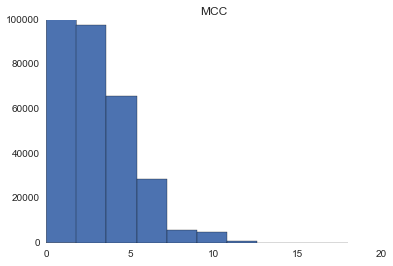

In [96]:
profile.hist()

In [ ]:
*Make WELLNESS table: (1) demographics, (2) smoking (3) obesity (4) depression, (5) # CC*

In [87]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

def convert_labels(data):
    for col_name in data.columns:
        col = data[col_name]
        if col.dtype == 'O':
            labels = col.unique()
            le.fit(labels)
            data[col_name] = le.transform(col)
    return data

In [92]:
profiles_converted = convert_labels(profile.dropna())

/Users/ceslee-work/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [93]:
profiles_converted.head()

,AGE,RACE,GENDER,MARITALSTAT,EDUCATION,REGION,LANGUAGE,OBESE,SMOKER,DEPRESSION,MCC
ID,,,,,,,,,,,
C01000361,2,2,1,0,1,9,1,0,1,0,2
C01000542,2,2,0,1,0,4,1,1,0,0,3
C01000633,2,2,1,0,1,9,1,0,0,0,5
C01000819,2,2,0,1,2,7,1,0,0,0,4
C01000988,2,2,1,1,2,0,1,0,0,0,4


*Checking for profile (survey) completeness*

In [2]:
# profiles['PCTCMP'].describe()

In [3]:
# profiles.count().plot(kind='bar', figsize=(14, 2.5))

# 2 - EXPLORE

###Quality Control (Transform)

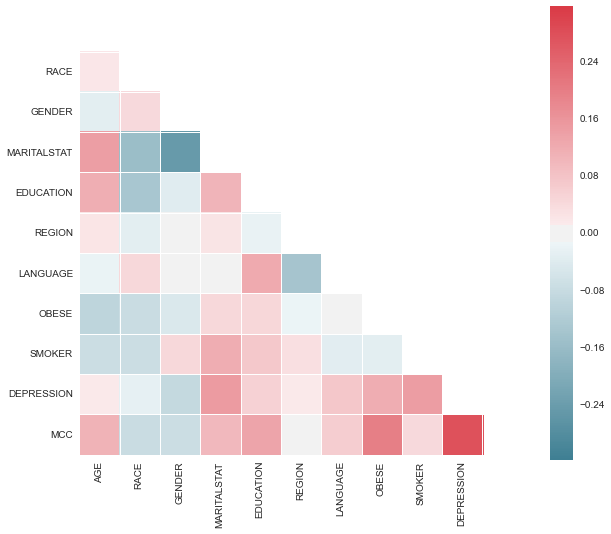

In [94]:
f, ax = plt.subplots(figsize=(9, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.corrplot(profiles_converted, annot=False, sig_stars=False,
             diag_names=False, cmap=cmap, ax=ax)
f.tight_layout()

In [ ]:
#@David
#missing data
#data completeness
#data quality

In [ ]:
#transformation code

In [4]:
# profiles.columns

Start simple.  Take each demographic variable and make a continuous variable for Multiple Chronic Conditions.

In [6]:
# profiles['MCC'] = (profiles[['HIGHBP', 'ANGCAD', 'CHF', 'AMI', 'OTHHRT', 'STROKE', 'COPD_E', 'GI_ETC', 'ATHHIP', 'ATHHAN', 'OSTEOPO', 'SCIATC', 'DIABET', 'ANYCAN']] == 1).sum(axis=1)
# profiles['ADL'] = (profiles[[u'DIFBTH', u'DIFDRS', u'DIFEAT', u'DIFCHR', u'DIFWLK', u'DIFTOL']] > 1).sum(axis=1)

In [7]:
# profiles_simple = profiles[['AGEGRP', 'RACE', 'GENDER', 'MRSTAT', 'EDUC', 'BMI', 'GENHTH', 'PLREG', 'ADL' , 'MCC' ]].set_index(profiles['CASE_ID'])

# # # replace a column name
# profiles_simple.rename(columns = {'PLREG' : 'REGION', 'DEPWK': 'DEP'}, inplace = True)

In [8]:
# profiles_simple.head()

In [11]:
# profiles_simple = profiles_simple.dropna()
# profiles_simple.head()

*Distribution of Data Points*